In [5]:
import pandas as pd
from data.mariadb import MariaDB

In [6]:
df = pd.read_csv('./data/2024_naver_news.csv', on_bad_lines='skip')
df.sort_values('company')
df[:3]

,company,content,date,title,url
0,DB하이텍,DB하이텍 소액주주연대가 DB하이텍 주주 일부에 대해 대량 보유 보고 공시 누락을 ...,2024.03.24,"뿔난 소액주주, DB하이텍 주총 앞두고 소송",https://n.news.naver.com/mnews/article/009/000...
1,DL,경제계 소식을 알아보는 비즈앤 시간입니다&&오늘16일은 어떤 소식이 있는지 살펴보겠...,2024.04.16,[비즈&] 교보생명컵 꿈나무체육대회 40년 홈커밍데이 外,https://n.news.naver.com/mnews/article/422/000...
2,GKL,중국 관광객 회복으로 카지노 실적 개선이 가시화하면서 카지노주 주가가 최근 한달새 ...,2024.04.11,"“인스파이어, 경쟁 아닌 공존” 카지노株 주가 훈풍",https://n.news.naver.com/mnews/article/009/000...


In [7]:
# 불러오기 및 데이터구조 변경 , 확인
with open('./data/지속가능경영보고서_키워드.csv', 'r',encoding='utf-8') as f:
    keywords = [lines.strip() for lines in f.readlines()][1:]
print(keywords[:3])
keyword_label = [tuple(keyword.split(',')) for keyword in keywords]
print(keyword_label[:3], len(keyword_label))

['누수, E', '소비, E', '모래, E']
[('누수', ' E'), ('소비', ' E'), ('모래', ' E')] 745


In [10]:
def process_content(df, keywords):
    """
    keyword = list(tuple)
    """

    df = df.drop_duplicates(subset='content')
    data = []

    for index, row in df.iterrows():
        sentences = row['content'].split('&&')
        for sentence in sentences:
            if len(sentence) > 40:
                setting = {'E': 0, 'S': 0, 'G': 0}
                for keyword, label in keywords:
                    if keyword in sentence:
                        setting[label.strip()] = 1
                data.append((row['company'], row['date'],row['url'], sentence, setting['E'], setting['S'], setting['G']))  # 데이터프레임에 맞춰서 설정
    return pd.DataFrame(data, columns=['Company','Date','URL', 'Sentence', 'E', 'S', 'G']) # 데이터 프레임에 맞춰서 설정

df_count = process_content(df, keyword_label)

In [59]:
df_count[:3], len(df_count)

(     기업명          날짜                                                 문장  E  S  \
 0  DB하이텍  2024.03.24  DB하이텍 소액주주연대가 DB하이텍 주주 일부에 대해 대량 보유 보고 공시 누락을 ...  1  1   
 1  DB하이텍  2024.03.24  이에 따라 오는 28일로 예정된 DB하이텍 주주총회에서 KCGI자산운용과 소액주주연...  1  1   
 2  DB하이텍  2024.03.24  DB하이텍 소액주주연대는 DB하이텍 제71기 정기주총에서 DB Inc 삼동흥산 빌텍...  1  1   
 
    G  
 0  1  
 1  1  
 2  1  ,
 954452)

In [11]:
df_filter = df_count[(df_count['E'] != 0) | (df_count['S'] != 0) | (df_count['G'] != 0)]
len(df_filter)

491745

In [61]:
df_filter.to_csv('sentence_label.csv' , index = False)

In [16]:
# font 설정
import matplotlib as mpl
import matplotlib.font_manager as fm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 전역글꼴설정 1
plt.rcParams["font.family"] = 'NanumGothic'

# 2
# plt.rc('font', family='AppleGothic') # For MacOS
plt.rc('font', family='Malgun Gothic') # For Windows


C:\Users\SDA10\AppData\Local\Temp\ipykernel_860\2648387110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['조합'] = df_filter.apply(lambda row: f"{row['E']}{row['S']}{row['G']}", axis=1)
C:\Users\SDA10\AppData\Local\Temp\ipykernel_860\2648387110.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=combinations_count.index, y=combinations_count.values, palette='viridis')


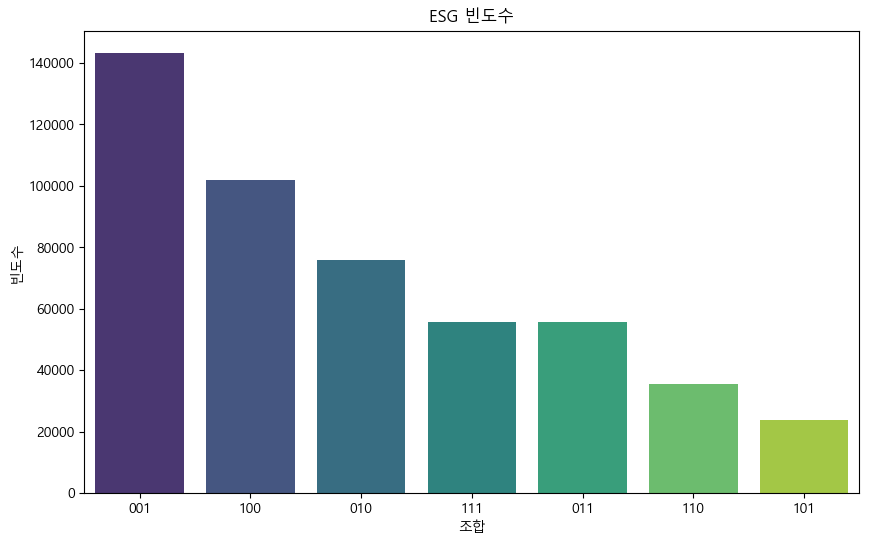

In [18]:
df_filter['조합'] = df_filter.apply(lambda row: f"{row['E']}{row['S']}{row['G']}", axis=1)
combinations_count = df_filter['조합'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=combinations_count.index, y=combinations_count.values, palette='viridis')
plt.title('ESG 빈도수')
plt.xlabel('조합')
plt.ylabel('빈도수')
plt.show()


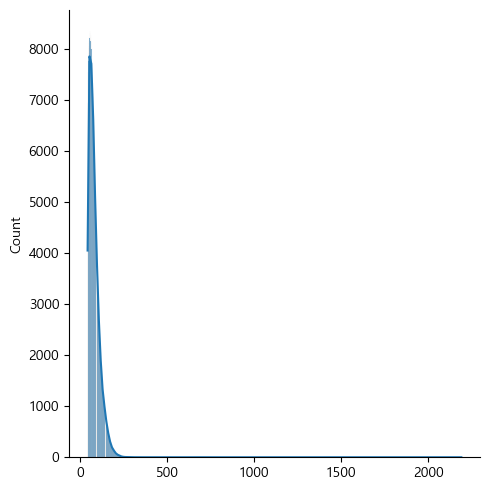

In [25]:
import seaborn as sns

length_list = list(map(len, df_filter['Sentence']))
sns.displot(length_list, kde=True)

In [27]:
max(length_list)

2191

In [33]:
sentence = [sentence for sentence in df_filter['Sentence'] if len(sentence)<200]

In [35]:
filter_df = df_filter[df_filter['Sentence'].apply(lambda x: len(x) < 200)]

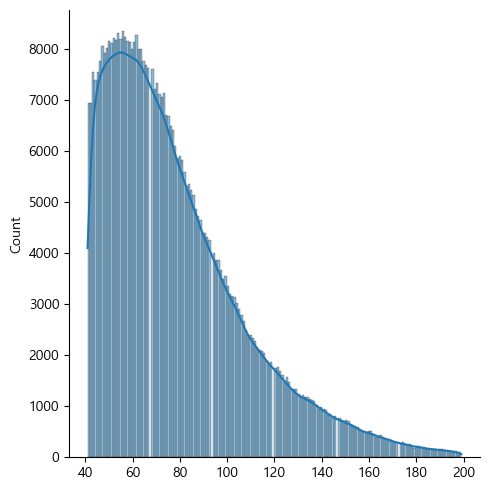

In [38]:
import seaborn as sns

length_list = list(map(len, filter_df['Sentence']))
sns.displot(length_list, kde=True)

C:\Users\SDA10\AppData\Local\Temp\ipykernel_860\4027507801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['조합'] = df_filter.apply(lambda row: f"{row['E']}{row['S']}{row['G']}", axis=1)
C:\Users\SDA10\AppData\Local\Temp\ipykernel_860\4027507801.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=combinations_count.index, y=combinations_count.values, palette='viridis')


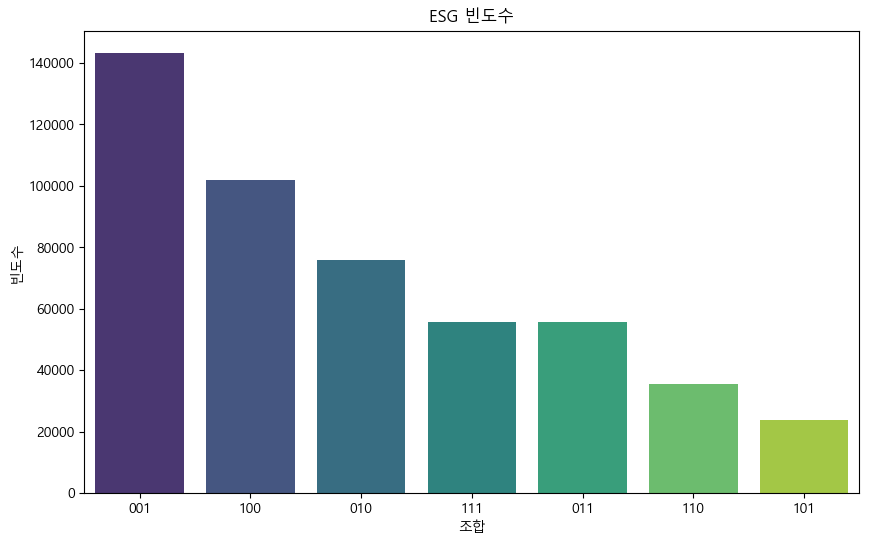

In [47]:
df_filter['조합'] = df_filter.apply(lambda row: f"{row['E']}{row['S']}{row['G']}", axis=1)
combinations_count = df_filter['조합'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=combinations_count.index, y=combinations_count.values, palette='viridis')
plt.title('ESG 빈도수')
plt.xlabel('조합')
plt.ylabel('빈도수')
plt.show()

In [23]:
def load_dataset(path, num_examples=None):
    # creating cleaned input, output pairs
    targ_lang, inp_lang = create_dataset(path, num_examples)

    input_tensor, inp_lang_tokenizer = tokenize(inp_lang)
    target_tensor, targ_lang_tokenizer = tokenize(targ_lang)

    return input_tensor, target_tensor, inp_lang_tokenizer, targ_lang_tokenizer

23739

In [63]:
with open('./data/aws_config','r',encoding='utf-8') as f:
    db_config = {lines.split('=')[0].strip():lines.split('=')[1].strip() for lines in f.readlines()}
db = MariaDB(db_config)